<a href="https://colab.research.google.com/github/Lenin22/MADE/blob/master/Marusya_AEC_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Загрузка данных

In [1]:
# from google.colab import files
# files.upload()

In [2]:
# # read https://github.com/opokualbert/Downloading-Kaggle-Datasets-into-Google-Colab/blob/master/Downloading_Kaggle_Datasets_into_Google_Colab.ipynb
# !mkdir -p ~/.kaggle

In [3]:
# !cp kaggle.json ~/.kaggle/

In [4]:
# !kaggle competitions download -c marusya-aec-challenge

In [5]:
# from google.colab import drive
# drive.mount('/content/drive')
# # !cp  train.tgz.zip test_students.tgz.zip /content/drive/MyDrive/'Marusya AEC Challenge'

In [6]:
# !rm train.tgz

In [7]:
# !unzip /content/drive/MyDrive/'Marusya AEC Challenge'/train.tgz.zip -d /content/drive/MyDrive/'Marusya AEC Challenge'/

In [8]:
# !unzip /content/drive/MyDrive/'Marusya AEC Challenge'/test_students.tgz.zip -d /content/drive/MyDrive/'Marusya AEC Challenge'/

In [9]:
# !tar -xvzf train.tgz

In [10]:
# !tar -xvzf /content/drive/MyDrive/'Marusya AEC Challenge'/train.tgz  --directory /content/drive/MyDrive/'Marusya AEC Challenge'/data/

### Посмотрим на данные

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
import os
import IPython.display as ipd
from scipy.io import wavfile
import librosa, librosa.display
from tqdm.notebook import tqdm
import random 

# read prefix for all files (full path = prefix + echo.wav/voice.wav )
files = []
prefix =  "/content/drive/MyDrive/Marusya AEC Challenge/data/train/"
for level1 in os.listdir(prefix):
  level1_path = os.path.join(prefix, level1)
  for level2 in os.listdir(level1_path):
    level2_path = os.path.join(level1_path, level2)
    files.append(level2_path)

In [21]:
idx = random.randint(0, len(files))
print(idx)
echo_file = os.path.join(files[idx], "echo.wav")
clean_file = os.path.join(files[idx], "voice.wav")
echo, samplerate = librosa.load(echo_file, sr=None, mono=False)
clean, samplerate = librosa.load(clean_file, sr=None, mono=False)
ipd.Audio(echo, rate=samplerate)

16085


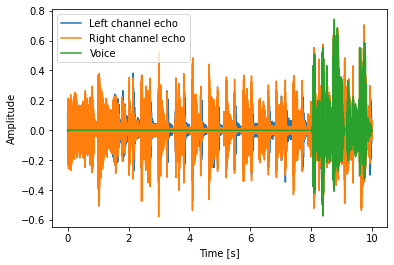

In [22]:
import matplotlib.pyplot as plt
import numpy as np
length = echo.shape[1] / samplerate
time = np.linspace(0., length, echo.shape[1])
plt.plot(time, echo[0], label="Left channel echo")
plt.plot(time, echo[1], label="Right channel echo")
plt.plot(time, clean, label="Voice")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

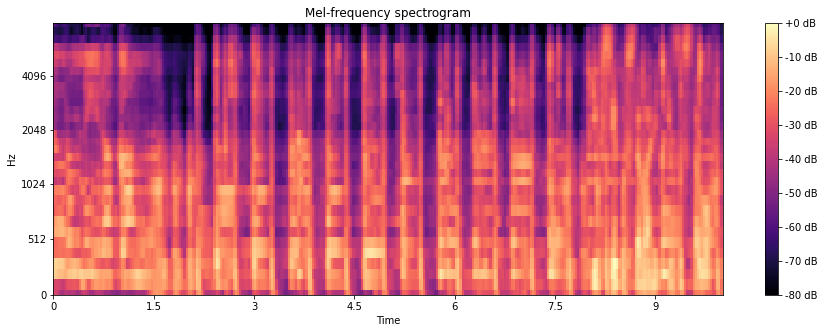

In [23]:
S = librosa.feature.melspectrogram(y=echo[1], sr=samplerate, n_mels=32,
                                    fmax=8000)
fig, ax = plt.subplots(figsize=(15,5))
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=samplerate,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

Записи - длиной 10 секунд, 2 канала у эхо и 1 - у войс, дискретизация - 16000